In [1]:
using Revise
using Plots

In [2]:
using Lehmann
using JLD2
using ElectronGas

┌ Info: Precompiling ElectronGas [8c98e03e-8755-48b1-a5ef-1e2e7812a7c9]
└ @ Base loading.jl:1342


In [3]:
d = jldopen("sigma.jld2")

JLDFile /Users/kunchen/project/FeynmanDiagram.jl/example/sigma.jld2 (read-only)
 ├─🔢 basic
 ├─🔢 qgrid
 ├─🔢 avg
 └─🔢 std

In [4]:
para =d["basic"]
qgrid = d["qgrid"].grid

22-element Vector{Float64}:
  0.0
  0.14285714285714285
  0.2857142857142857
  0.42857142857142855
  0.5714285714285714
  0.7142857142857142
  0.8571428571428572
  1.0
  1.4829742702960227
  1.9659485405920456
  2.448922810888068
  2.9318970811840908
  3.4148713514801137
  3.897845621776136
  4.380819892072159
  6.496643182744012
  8.612466473415864
 10.728289764087716
 12.844113054759568
 14.959936345431423
 17.075759636103275
 19.19158292677513

In [8]:
kF = para.kF

1.9191582926775128

In [5]:
#dlr = d["dlr"];
avg = d["avg"];
std = d["std"];

In [15]:
p=plot(qgrid/kF, avg[:, 1], yerr = std[:, 1], msc =:auto, label = "Order 1, instant")
plot!(p,qgrid/kF, avg[:, 2], yerr = std[:, 2], msc =:auto, label = "Order 2, instant")
plot!(p,qgrid/kF, avg[:, 3], yerr = std[:, 3], msc =:auto, label = "Order 2, dynamic")
plot!(p,qgrid/kF, avg[:, 4], yerr = std[:, 4], msc =:auto, label = "Order 3, instant")
plot!(p,qgrid/kF, avg[:, 5]+avg[:, 6], msc =:auto, yerr = std[:, 5]+ std[:, 6], label = "Order 3, dynamic")
xlabel!(p, "q/kF")
ylabel!(p, "Self energy")
savefig("sigma.pdf")

In [16]:
p=plot(qgrid/kF, avg[:, 1].*(qgrid/kF).^2, yerr = std[:, 1], msc =:auto, label = "Order 1, instant")
plot!(p,qgrid/kF, avg[:, 2].*(qgrid/kF).^2, yerr = std[:, 2], msc =:auto, label = "Order 2, instant")
plot!(p,qgrid/kF, avg[:, 3].*(qgrid/kF).^2, yerr = std[:, 3], msc =:auto, label = "Order 2, dynamic")
plot!(p,qgrid/kF, avg[:, 4].*(qgrid/kF).^2, yerr = std[:, 4], msc =:auto, label = "Order 3, instant")
plot!(p,qgrid/kF, (avg[:, 5]+avg[:, 6]).*(qgrid/kF).^2, msc =:auto, yerr = std[:, 5]+ std[:, 6], label = "Order 3, dynamic")
xlabel!(p, "q/kF")
ylabel!(p, "(Self energy)*(q/kF)^2")
savefig("sigma_q2.pdf")

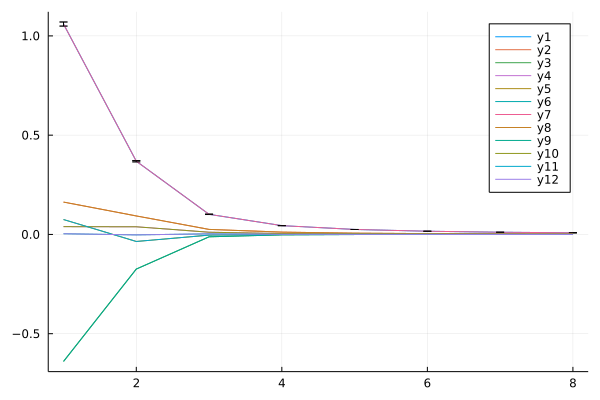

In [8]:
plot!(avg[:, 1], yerr = std[:, 1])
plot!(avg[:, 2])
plot!(avg[:, 3])
plot!(avg[:, 4])
plot!(avg[:, 5])
plot!(avg[:, 6])

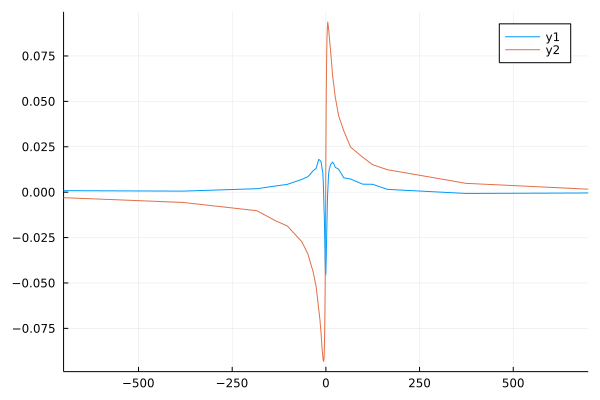

In [5]:
p = plot(dlr.n, real(avg[:, 1, 2]), xlims= (-700, 700))
plot!(dlr.n, imag(avg[:, 1, 2]))

In [6]:
matfreq2tau(dlr, avg[:, 1, 2], [0.0,])

1-element Vector{ComplexF64}:
 0.647825112384453 - 0.06384127148521657im

In [18]:
gt = matfreq2tau(dlr, avg[:, 1, 2], dlr.τ, sumrule = 1.0)

42-element Vector{ComplexF64}:
    0.881618870077084 - 0.34266805983874776im
   1.1212730531432016 + 0.1636706603355846im
   0.9499698323706025 - 0.06621957844371508im
   0.7675187074918768 - 0.012572544677903497im
   0.5627134916884529 + 0.029514932662455317im
   0.4360124275512168 - 0.0013201415744393344im
  0.33090332786144405 - 0.0016810287746767078im
  0.27577955777650764 + 0.003347630216320091im
   0.1717028796667803 + 0.0011654062026029196im
  0.13614855339606055 + 0.0035931101099508276im
  0.06767424244358074 - 0.004804834291881332im
 0.051399249072928845 - 0.00243700441561741im
 0.026673210373286738 - 0.0004890680691010751im
                      ⋮
   0.1197935490053951 - 0.0021140742556605297im
  0.18148566399855545 - 0.0028071436106251006im
  0.24018419936453558 + 0.010865451865776893im
   0.2853182939554126 - 0.006278309116068615im
  0.36345283117722404 + 0.008982400250490429im
   0.4049356983802567 + 0.008325221729617846im
  0.49057591063655664 + 0.002911852339579707im
   

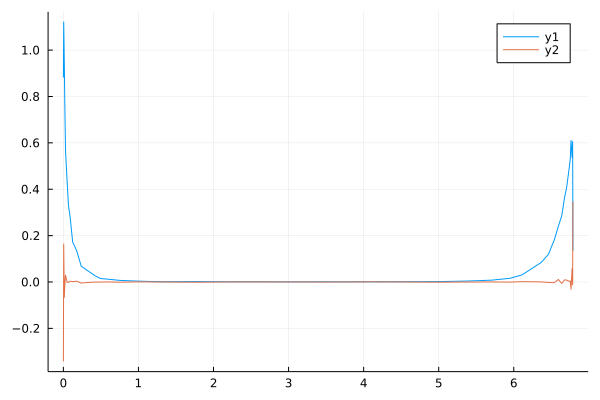

In [19]:
p = plot(dlr.τ, real(gt))
plot!(dlr.τ, imag(gt))

In [12]:
data = ones(ComplexF64, dlr.size)*1.0556;
matfreq2tau(dlr, data, dlr.τ, dlr.n)

42-element Vector{ComplexF64}:
    542.5565356094429 - 19.15440037418083im
  -42.295138825812444 + 6.790513648753111im
   34.337817525740554 + 3.0017135577682685im
   -7.448114852899784 - 2.9580981730614866im
  -10.040729623597452 + 0.7167535959274399im
   -1.801735912150715 - 1.3429461197037498im
   1.1676745269177353 - 1.5646301550225754im
   1.7348459113376111 + 1.6126557826307562im
  -2.4623721010353368 - 0.6372904210703421im
    1.231020848914951 + 0.32882882231173227im
  -0.7587425082692973 - 0.14732911158841383im
    0.565461808080498 + 0.033790355603663336im
 -0.18624587035707094 - 0.05826727992967173im
                      ⋮
   -0.416163167632863 - 0.10477952875859525im
   0.9824260208073157 + 0.09900636074369505im
  -1.1497603787282853 + 0.16251930846439794im
   0.1890201138492778 - 0.6347588719726359im
   1.9984085156018216 + 1.013609009231073im
    -4.53549315711032 + 0.058882614146313295im
   1.1207634649598472 + 0.30965155510885195im
  -1.0949570706292964 + 2.60019216166